In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import os
import glob
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
import keras
import tensorflow
from keras.engine.saving import load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, MaxPooling2D, concatenate, AveragePooling2D
from keras import models
from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from keras import regularizers
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score


In [3]:
import cv2
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D,Dropout,SeparableConv2D,BatchNormalization, Activation, Dense
from keras.applications.mobilenet import MobileNet
from keras.optimizers import Adam
import sys
import warnings

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import glob
import cv2
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras import applications
from keras import backend as K
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import random

from matplotlib import pyplot as plt

In [40]:

mura_Dir = "MURA-v1.1/"
train_imgs_path=pd.read_csv(mura_Dir+'train_image_paths.csv',names=["Train Dataset"])
train_labels=pd.read_csv(mura_Dir+'train_labeled_studies.csv',names=["Train Labeled Studies","label"])
test_imgs_path=pd.read_csv(mura_Dir+'valid_image_paths.csv',names=["Test Dataset"])
test_labels=pd.read_csv(mura_Dir+'valid_labeled_studies.csv',names=["Test Labeled Studies","label"])

In [41]:
train_imgs_path=train_imgs_path.sort_values(by=['Train Dataset'])
train_labels=train_labels.sort_values(by=['Train Labeled Studies'])
test_imgs_path=test_imgs_path.sort_values(by=['Test Dataset'])
test_labels=test_labels.sort_values(by=['Test Labeled Studies'])

In [42]:
test_labels['Body Part']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study Type']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])
test_labels['p']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[3])[:20])


In [43]:
train_labels['Body Part']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study Type']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])
train_labels['p']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[3])[:20])


# $~Statistics Of Data$ 
Bar Plots For Mura variants between its count between classes and Body Parts , the Body parts , Studies of Patients and their  Classes


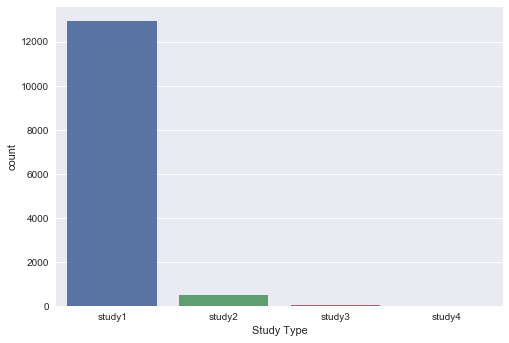

In [44]:
sns.countplot(data=train_labels,x='Study Type')

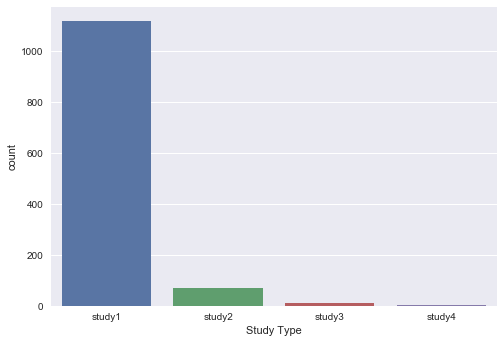

In [45]:
sns.countplot(data=test_labels,x='Study Type')

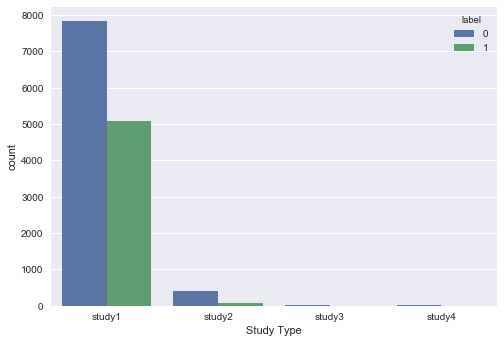

In [46]:
sns.countplot(data=train_labels,x='Study Type',hue='label')

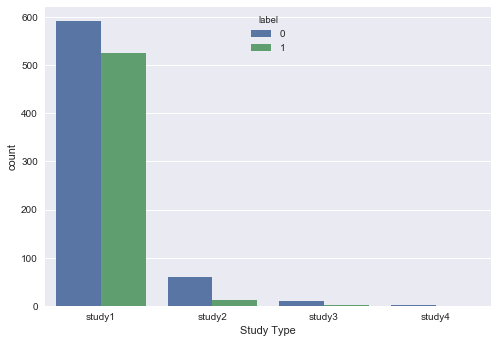

In [47]:
sns.countplot(data=test_labels,x='Study Type',hue='label')

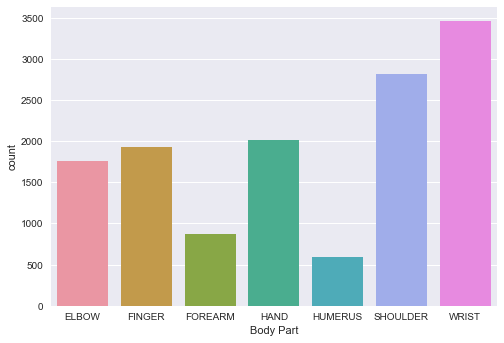

In [48]:
sns.countplot(data=train_labels,x='Body Part')

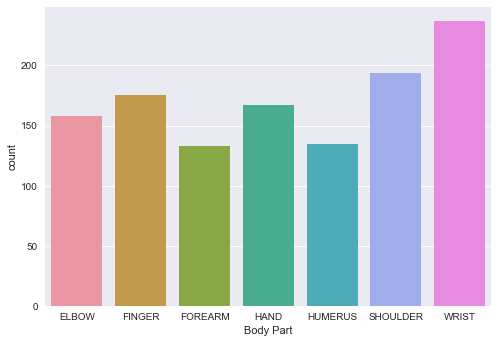

In [49]:
sns.countplot(data=test_labels,x='Body Part')

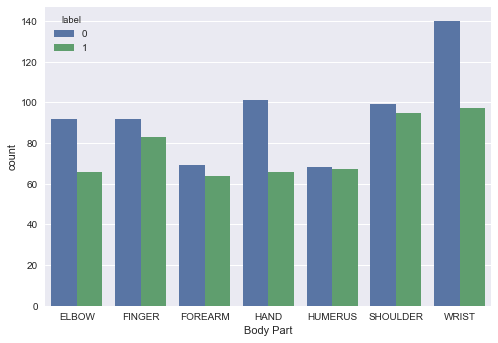

In [50]:
import seaborn as sns
sns.countplot(data=test_labels,x='Body Part',hue='label')

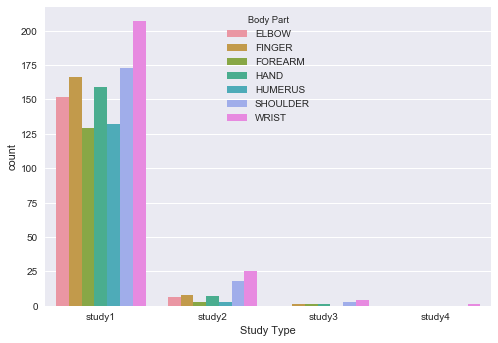

In [51]:
sns.countplot(data=test_labels,x='Study Type',hue='Body Part')

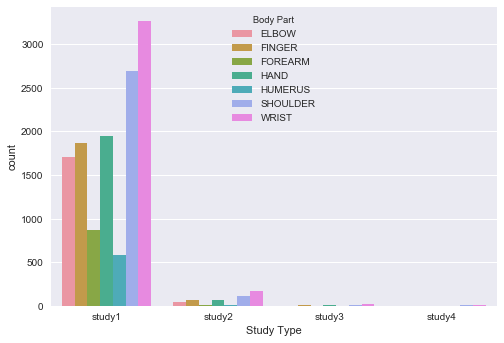

In [52]:
sns.countplot(data=train_labels,x='Study Type',hue='Body Part')

In [53]:
def fileImagesOfStudy(path):
    img_dir = path # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    data = []
    i=0
    for f1 in files:
        i=i+1
        img = cv2.imread(f1)
        data.append(img)
           
    return data

In [54]:
import matplotlib.pyplot as plt


In [55]:
def stretching_Data(files_,dim):
    stretch=[]
    for e in range(0,len(files_)):
        f=files_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            stretch.append(cv2.resize(dd[n],dsize=dim))
               
    return stretch

In [56]:
def stretching_Labels(labels_):
    labels=[]
    for e in range(0,len(labels_)):
        l=labels_.iloc[e]['label']
        f=labels_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            labels.append(l)
    return labels

In [57]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.grid(False)

        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)

    plt.show()

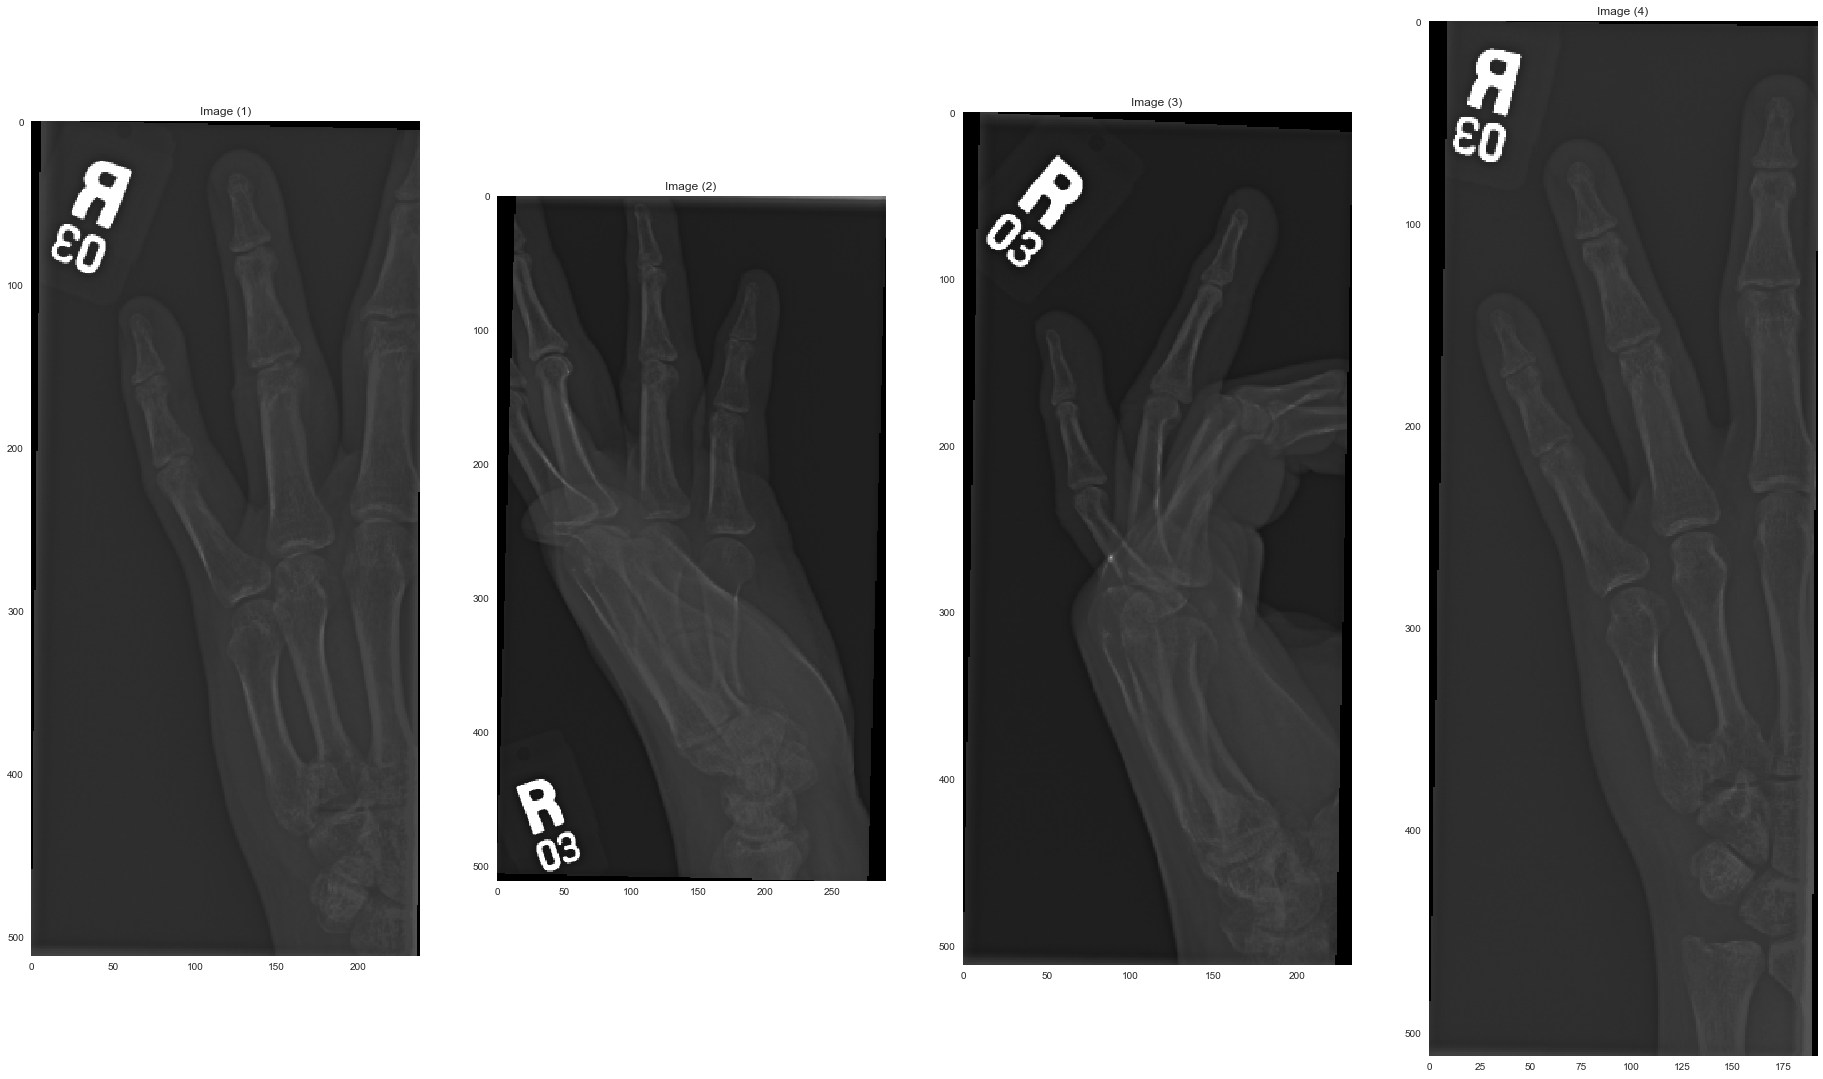

In [58]:

l=train_labels.iloc[2054]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

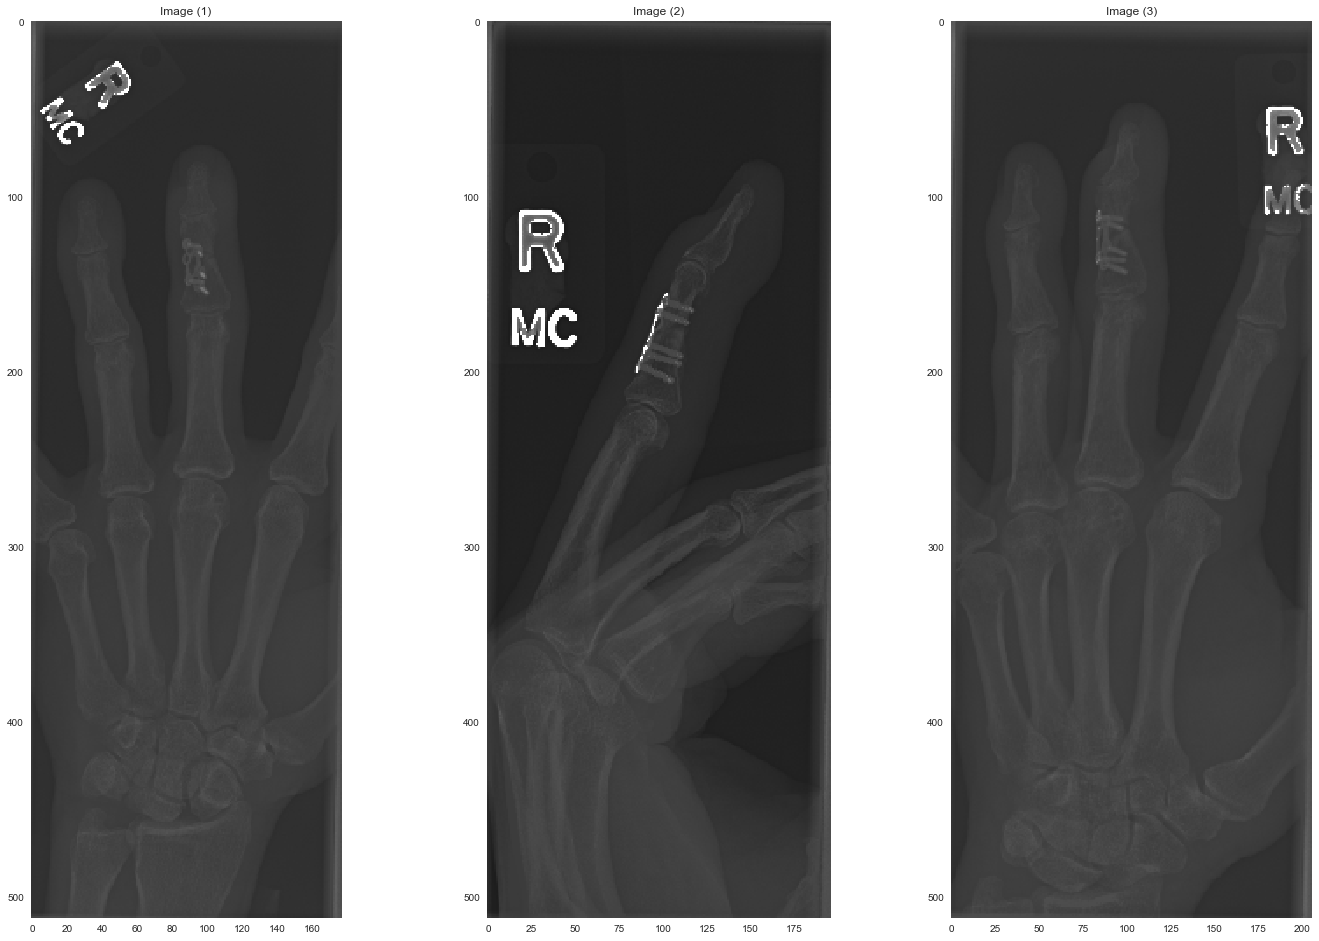

In [59]:
l=train_labels.iloc[2093]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

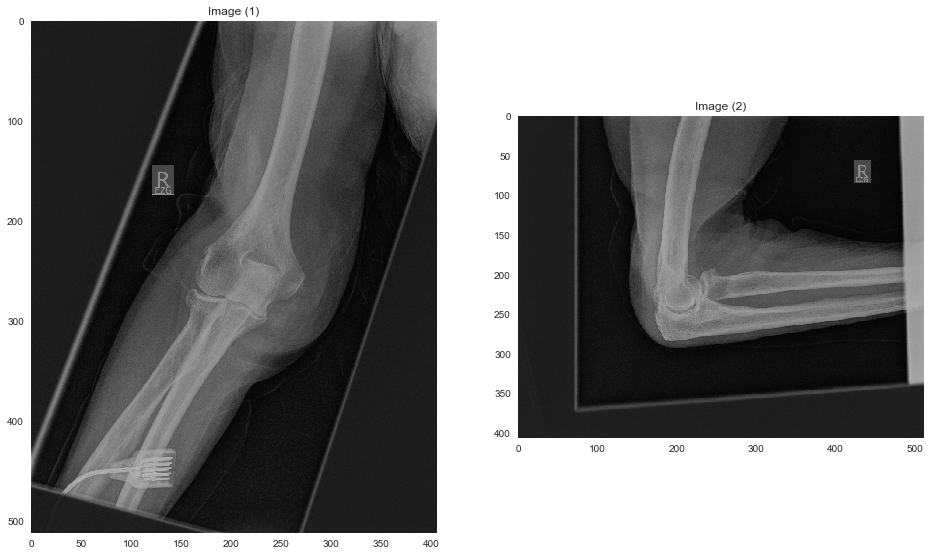

In [ ]:
l=train_labels.iloc[3]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

In [ ]:
l=train_labels.iloc[7899]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
%matplotlib inline
plt.style.use("seaborn")


In [ ]:
def prepareDataMobile(className):
    reszizing_Dim=(80,80)
    train_= train_labels[train_labels['Body Part'] ==className]
    test_ = test_labels[test_labels['Body Part'] ==className]
    data__Test=stretching_Data(test_,reszizing_Dim)
    labels_Test=stretching_Labels(test_)
    data__Train=stretching_Data(train_,reszizing_Dim)
    labels_Train=stretching_Labels(train_)
    data__Test=np.asarray(data__Test)
    labels_Test=np.asarray(labels_Test)
    data__Train=np.asarray(data__Train)
    labels_Train=np.asarray(labels_Train)

    return data__Train,labels_Train,data__Test,labels_Test

In [ ]:
from keras import regularizers

def mobileNet_Model(data__Train,labels_Train,data__Test,labels_Test):
    if not sys.warnoptions:
        warnings.simplefilter("ignore")
    base_model = MobileNet(include_top=False,weights='imagenet', input_shape=data__Train.shape[1:])
    base_model.trainable = False
    x=base_model.output
    x=keras.layers.MaxPooling2D()(x)
    x=Flatten()(x)
    x=Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.5)(x)
    x=Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x=Dropout(0.5)(x)
    preds=Dense(1, activation='sigmoid')(x)

    model=Model(inputs=base_model.input,outputs=preds)
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    history = model.fit(data__Train, labels_Train, epochs=20, batch_size=64,  validation_data=(data__Test, labels_Test))
    return history, model

In [ ]:
def plotingModel(history_):

    plt.plot(history_.history['loss'])
    plt.plot(history_.history['val_loss'])
    plt.title("Train vs Validation Loss")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.grid(False)

    plt.legend(['train', 'test'], loc='upper right')

In [ ]:
def kappaC(tn,fp,fn,tp):
    total_n=tn+fp+fn+tp
    P_totalAgree=(tn+tp)/total_n
    acctual_no=tn+fp
    acctual_yes=fn+tp
    predicted_no=tn+fn
    predicted_yes=fp+tp
    P__no=(acctual_no/total_n)*(predicted_no/total_n)    
    P__yes=(acctual_yes/total_n)*(predicted_yes/total_n)
    Pchance=P__no+P__yes
    theKappa=(P_totalAgree-Pchance)/(1-Pchance)
    return theKappa

In [ ]:
def plotResults(data__Test,labels_Test,_model):
    test_loss, test_acc = _model.evaluate(data__Test, labels_Test, batch_size=100)
    print("Loss on test set: ", test_loss)
    print("Accuracy on test set: ", test_acc)
    test_logits = _model.predict(data__Test, batch_size=10)
    cm  = confusion_matrix(labels_Test, np.round(test_logits))
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Normal', 'Abnromal'], fontsize=16)
    plt.yticks(range(2), ['Normal', 'Abnormal'], fontsize=16)
    plt.show()
    true_negative, false_positive, false_negative, true_positive  = cm.ravel()
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1=2*((precision*recall)/(precision+recall))
    kappa=kappaC(true_negative, false_positive, false_negative, true_positive)
    
    print('Precison of MURA for Abnormal:{:.2f}'.format(precision))
    print('Recall of MURA for Abnormal:{:.2f}'.format(recall))
    print('Fmeasure of MURA for Abnormal:{:.2f}'.format(f1))
    print('Kappa of MURA for Abnormal:{:.2f}'.format(kappa))
    num_test = 20
    predictions = _model.predict(data__Test[:num_test,:,:,:])
    for i in range(num_test):
        if predictions[i] <test_acc:
            print("Predicted: Abnormal ",predictions[i])
        else:
            print("predicted: Normal",predictions[i])
        plt.imshow(data__Test[i])
        plt.grid(False)

        plt.show()
    return test_acc,kappa
   

$Molbile Net$

In [ ]:
armClass='FOREARM'
dataArm__Train_mobile,labelsArm_Train_mobile,dataArm__Test_mobile,labelsArm_Test_mobile=prepareDataMobile(armClass)
historyMobile_arm, modelMobile_arm=mobileNet_Model(dataArm__Train_mobile,labelsArm_Train_mobile,dataArm__Test_mobile,labelsArm_Test_mobile)
plotingModel(historyMobile_arm)


In [ ]:
test_accArm_mob=plotResults(dataArm__Test_mobile,labelsArm_Test_mobile,modelMobile_arm)

In [ ]:
elbowClass='ELBOW'
dataElbow__Train_mobile,labelsElbow_Train_mobile,dataElbow__Test_mobile,labelsWlbow_Test_mobile=prepareDataMobile(elbowClass)
historyMobile_elbow, modelMobile_elbow=mobileNet_Model(dataElbow__Train_mobile,labelsElbow_Train_mobile,dataElbow__Test_mobile,labelsWlbow_Test_mobile)
plotingModel(historyMobile_elbow)


In [ ]:
test_accElbow_mob,kappa_elbowMobile=plotResults(dataElbow__Test_mobile,labelsWlbow_Test_mobile,modelMobile_elbow)

In [ ]:
fingerClass='FINGER'
dataFinger__Train_mobile,labelsFinger_Train_mobile,dataFinger__Test_mobile,labelsFinger_Test_mobile=prepareDataMobile(fingerClass)
historyMobile_finger, modelMobile_finger=mobileNet_Model(dataFinger__Train_mobile,labelsFinger_Train_mobile,dataFinger__Test_mobile,labelsFinger_Test_mobile)
plotingModel(historyMobile_finger)


In [ ]:
test_accFinger_mob,kappa_FingerMobile=plotResults(dataFinger__Test_mobile,labelsFinger_Test_mobile,modelMobile_finger)


In [ ]:
humerusClass='HUMERUS'
dataHumerus__Train_mobile,labelsHumrus_Train_mobile,dataHumerus__Test_mobile,labelsHumerus_Test_mobile=prepareDataMobile(humerusClass)
historyHumerus_mobile,modelHumerus_mobile=mobileNet_Model(dataHumerus__Train_mobile,labelsHumrus_Train_mobile,dataHumerus__Test_mobile,labelsHumerus_Test_mobile)
plotingModel(historyHumerus_mobile)


In [ ]:
test_accHmerus_mob,kappa_hermusMobile=plotResults(dataHumerus__Test_mobile,labelsHumerus_Test_mobile,modelHumerus_mobile)

In [ ]:
shoulderClass='SHOULDER'
dataShoulder__Train_mobile,labelsShoulder_Train_mobile,dataShoulder__Test_mobile,labelsShoulder_Test_mobile=prepareDataMobile(shoulderClass)
historyShoulder_mobile,modelShoulder_mobile=mobileNet_Model(dataShoulder__Train_mobile,labelsShoulder_Train_mobile,dataShoulder__Test_mobile,labelsShoulder_Test_mobile)
plotingModel(historyShoulder)


In [ ]:
test_accShoulder_mob,kappa_shoulderMobile=plotResults(dataShoulder__Test,labelsShoulder_Test,modelShoulder)

In [ ]:
handClass='HAND'
dataHAND__Train_mobile,labelsHAND_Train_mobile,dataHAND__Test_mobile,labelsHAND_Test_mobile=prepareDataMobile(handClass)
historyHand_mobile,modelHand_mobile=mobileNet_Model(dataHAND__Train_mobile,labelsHAND_Train_mobile,dataHAND__Test_mobile,labelsHAND_Test_mobile)
plotingModel(historyHand_mobile)


In [ ]:
test_accHand_mob,kappa_handMobile=plotResults(dataHAND__Test_mobile,labelsHAND_Test_mobile,modelHand_mobile)

In [ ]:
wristClass='WRIST'
dataWRIST__Train_mobile,labelsWRIST_Train_mobile,dataWRIST__Test_mobile,labelsWRIST_Test_mobile=prepareDataMobile(wristClass)
historyWrist_mobile,modelWrist_mobile=mobileNet_Model(dataWRIST__Train_mobile,labelsWRIST_Train_mobile,dataWRIST__Test_mobile,labelsWRIST_Test_mobile)
plotingModel(historyWrist_mobile)


In [ ]:
test_accWrist_mob,kappa_wristMobile=plotResults(dataWRIST__Test_mobile,labelsWRIST_Test_mobile,modelWrist_mobile)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bodyPart = ['ELBOW', 'FINGER','FOREARM','HAND', 'HUMERUS', 'SHOULDER', 'WRIST']
test_acc = [test_accElbow_mob,test_accFinger_mob,test_accArm_mob,test_accHand_mob,test_accHmerus_mob,test_accShoulder_mob,test_accWrist_mob]
ax.bar(bodyPart,test_acc)
plt.title("MobileNet Body Parts Accuracies")
plt.ylabel('Body Part')
plt.xlabel('Accuracy')

plt.show()

$Save in CSV File$

In [3]:
test_acc = [test_accElbow_mob,test_accFinger_mob,test_accArm_mob,test_accHand_mob,test_accHmerus_mob,test_accShoulder_mob,test_accWrist_mob]


In [4]:
import numpy
numpy.savetxt("MobileNet_accuracy.csv", test_acc, delimiter=",")
